In [1]:
from tensorflow import keras
from keras.models import load_model
import pandas as pd
model = load_model("/Users/paolo/Documents/TC_old/data/model_1l_512n_relu_dropout_std.h5")
import shap
import numpy as np

import tensorflow as tf

print(f'tensorflow version {tf.__version__}')

from imblearn.over_sampling import SMOTE
from collections import Counter
from numpy import * 

import pandas as pd
import io
import requests
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Activation, Dropout


2022-11-07 11:01:17.711075: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-11-07 11:01:17.711422: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1
tensorflow version 2.10.0


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn import metrics

def plot_roc(pred,y):
    fpr, tpr, _ = roc_curve(y, pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()
    
def test_models(model, x_test, y_test):
    
    pred = model.predict(x_test)

    plot_roc(pred,y_test)


    score = metrics.accuracy_score(y_test, np.round(pred))
    print(f"Accuracy score: {score}")


    cm = confusion_matrix(y_test, np.round(pred))
    np.set_printoptions(precision=2)
    print(cm)


In [3]:
def dataLoad():
    test = pd.read_csv('/Users/paolo/Documents/TC/data/test_real_tom_target.csv')
    train = pd.read_csv('/Users/paolo/Documents/TC/data/training_real_tom_target.csv')
    val = pd.read_csv('/Users/paolo/Documents/TC/data/validation_real_tom_target.csv')
    print(train.head())
    
    #Split data
    x_train = train[[ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst']]
    print ("******training features******")
    print (x_train)
    y_train = train[['Real_tom_lsm']]
    print ("******training target******")
    print (y_train)
    
    x_test = test[[ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst']]
    print ("******test features******")
    print (x_test)
    y_test = test[['Real_tom_lsm']]
    print ("******test target******")
    print (y_test)
    
    x_val = val[[ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst']]
    print ("******validation features******")
    print (x_val)
    y_val = val[['Real_tom_lsm']]
    print ("******validation target******")
    print (y_val)
    
    print('Before Smote')

    dff = y_train
    M = y_train.to_numpy()
    # summarize dataset
    classes = unique(M)
    print(classes)
    total = len(M)
    for c in classes:
        n_examples = len(M[M==c])
        percent = n_examples / total * 100
        print('> Class=%d : %d/%d (%.1f%%)' % (c, n_examples, total, percent))
    
    smt = SMOTE()
    
    X_train_sm, Y_train_sm = smt.fit_resample(x_train, y_train)
    
    print('After SMOTE')
    dff = Y_train_sm
    M = Y_train_sm.to_numpy()
    # summarize dataset
    classes = unique(M)
    print(classes)
    total = len(M)
    for c in classes:
        n_examples = len(M[M==c])
        percent = n_examples / total * 100
        print('> Class=%d : %d/%d (%.1f%%)' % (c, n_examples, total, percent))
        
    return X_train_sm, Y_train_sm, x_val, y_val, x_test, y_test

In [4]:
x_train_sm, y_train_sm, x_val, y_val, x_test, y_test = dataLoad()


from sklearn.preprocessing import StandardScaler
trainScaler = StandardScaler()

x_train_scaled = trainScaler.fit_transform(x_train_sm)
x_val_scaled = trainScaler.transform(x_val)
x_test_scaled = trainScaler.transform(x_test)

   Unnamed: 0        time  latitude  longitude        vo          r     u_200  \
0           0  1980-01-01       0.0       20.0  0.000007  80.761185  1.909660   
1           1  1980-01-01       0.0       22.5  0.000004  80.703650  1.165733   
2           2  1980-01-01       0.0       25.0  0.000007  78.231514 -1.311676   
3           3  1980-01-01       0.0       27.5  0.000010  79.631010 -3.777573   
4           4  1980-01-01       0.0       30.0  0.000010  71.573875 -5.734505   

      u_850     v_200     v_850        ttr  sst  lsm  Real_tom_lsm  
0 -3.323872  1.687164 -1.823624 -247.54074  0.0  0.0           0.0  
1 -2.844494  1.060593 -1.991425 -240.00592  0.0  0.0           0.0  
2 -2.125244  3.280617 -1.931789 -223.76889  0.0  0.0           0.0  
3 -1.122395  5.743889 -1.243538 -235.55556  0.0  0.0           0.0  
4 -1.362953  6.514030 -0.954163 -254.03260  0.0  0.0           0.0  
******training features******
               vo          r      u_200     u_850      v_200     v_85

In [5]:
train = pd.read_csv('/Users/paolo/Documents/TC/data/training_real_tom_target.csv')
x_train = train[[ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst']]
y_train = train[['Real_tom_lsm']]

x_train_scaled_original = trainScaler.transform(x_train)

In [6]:
x_train_scaled_original = pd.DataFrame(data=x_train_scaled_original ,columns=x_train.columns)

print(x_train_scaled_original.shape)
print(y_train.shape)


(4268771, 8)
(4268771, 1)


# show the model

In [33]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 512)               4608      
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 513       
                                                                 
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________
None


16859/16859 [==============================] - 19s 1ms/step


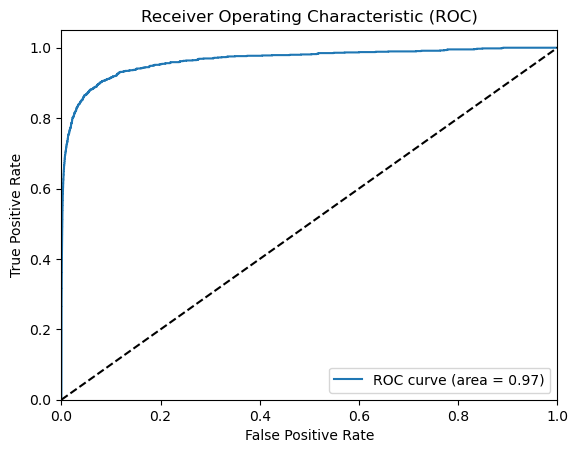

Accuracy score: 0.9263670857685171
[[498824  39614]
 [   110    939]]


In [37]:
test_models(model, x_test_scaled, y_test)

# Fit the explainer

In [6]:
train_samples = pd.concat((x_train_scaled_original.loc[y_train.values.reshape(-1,)==0,:].sample(n=2500),
                           x_train_scaled_original.loc[y_train.values.reshape(-1,)==1,:].sample(n=2500)),axis=0)


In [ ]:
#explainer = shap.Explainer(model_relu,x_train.values)
#explainer = shap.KernelExplainer(model.predict,x_train)
#explainer = shap.Explainer(model)
#background = x_train.loc[np.random.choice(x_train.shape[0], 1000, replace=False),:].values
#e = shap.DeepExplainer(model, background)
explainer = shap.DeepExplainer(model, train_samples.values)


In [ ]:
shap_values = explainer.shap_values(x_test_scaled)

In [ ]:
import pickle
with open('shap_values_std.pickle', 'wb') as f:
    pickle.dump(shap_values, f)


# Open pickle and plots

In [7]:
import pickle
import shap

with open('shap_values_std.pickle', 'rb') as f:
    shap_values = pickle.load(f)

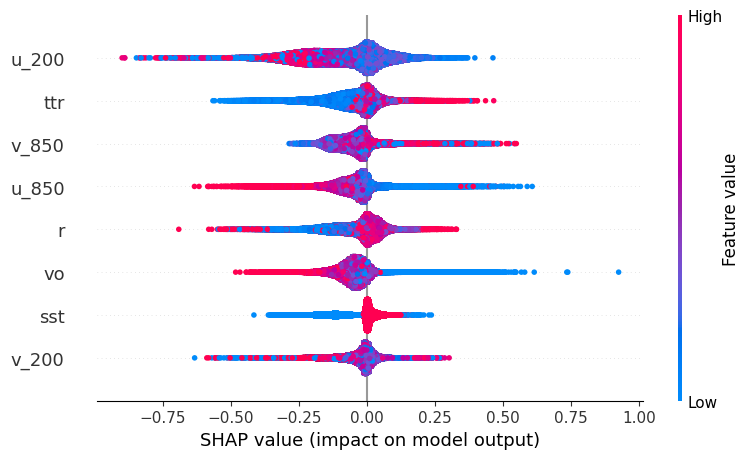

In [8]:
shap.summary_plot(shap_values[0], x_test_scaled, feature_names=x_test.columns.values,max_display=10)

In [9]:
res = model.predict(x_test_scaled)

    1/16859 [..............................] - ETA: 56:25

2022-11-07 11:02:23.574754: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-11-07 11:02:23.700711: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


16859/16859 [==============================] - 19s 1ms/step


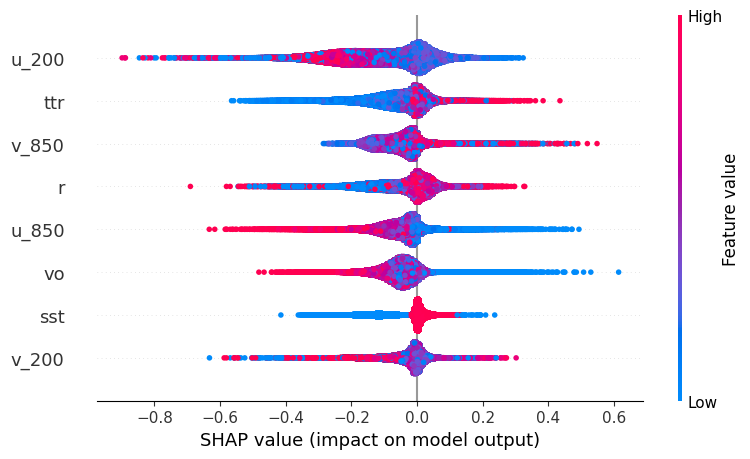

In [10]:
# only the 0s
shap.summary_plot(shap_values[0][np.where(res<0.5)[0]], x_test_scaled[np.where(res<0.5)[0]], feature_names=x_test.columns.values,max_display=10)


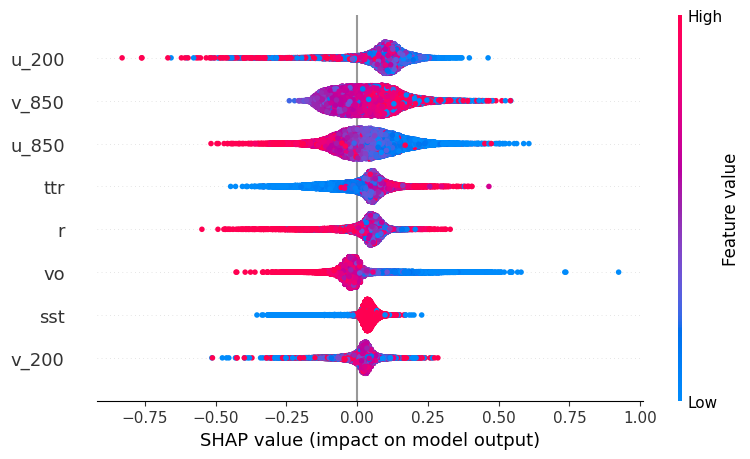

In [11]:
# only the 1s
shap.summary_plot(shap_values[0][np.where(res>=0.5)[0]], x_test_scaled[np.where(res>=0.5)[0]], feature_names=x_test.columns.values,max_display=10)


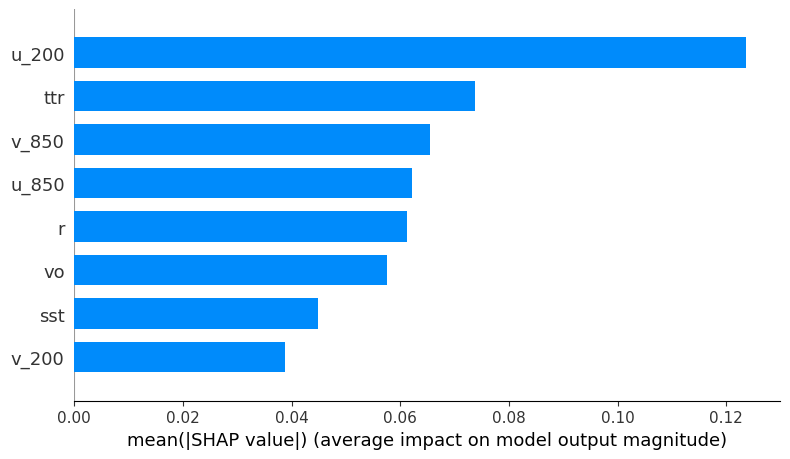

In [17]:
shap.summary_plot(shap_values[0], max_display=15, show=False, plot_type='bar', feature_names=x_test.columns.values)


In [12]:
#shap_values = explainer(x_test[0:100].values)
#shap_values = explainer.shap_values(x_test)
#shap_values = explainer(x_train)
test = pd.read_csv('/Users/paolo/Documents/TC/data/test_real_tom_target.csv')
print(test.iloc[7310,:])
print(test.iloc[7330,:])
print(model.predict(x_test_scaled[7310,:].reshape(1,-1)))
print(shap_values[0][7310])
print(model.predict(x_test_scaled[7330,:].reshape(1,-1)))
print(shap_values[0][7330])

Unnamed: 0            7310
time            2016-01-20
latitude             -12.5
longitude             25.0
vo                0.000004
r                 89.41517
u_200            -8.936073
u_850             2.665504
v_200              0.17524
v_850             -4.40984
ttr             -176.64314
sst                    0.0
lsm                    0.0
Real_tom_lsm           0.0
Name: 7310, dtype: object
Unnamed: 0            7330
time            2016-01-20
latitude             -12.5
longitude             75.0
vo               -0.000084
r                   91.012
u_200            -7.530083
u_850             8.257233
v_200            -0.457588
v_850             3.975689
ttr              -98.60463
sst              302.55276
lsm                    0.0
Real_tom_lsm           1.0
Name: 7330, dtype: object
1/1 [==============================] - 0s 26ms/step
[[0.00763762]]
[-0.08191081  0.06216355 -0.0868568  -0.05209381 -0.01071908 -0.1508985
 -0.00443011 -0.14628578]
1/1 [======================

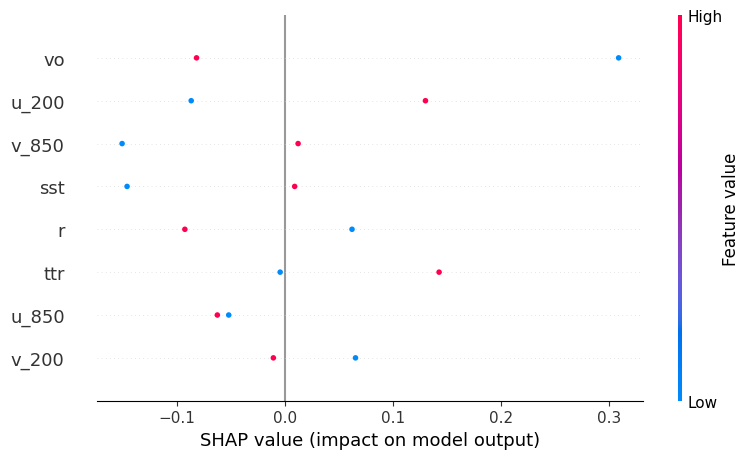

In [13]:
shap.summary_plot(shap_values[0][[7310,7330]], x_test_scaled[[7310,7330],:], feature_names=x_test.columns,max_display=10)


In [14]:
x_test_scaled[[7310,7330],:]

array([[ 0.5348343 ,  1.28501016, -0.92441435,  1.03776021,  0.42602162,
        -0.84963625,  0.92467895, -2.16659025],
       [-1.52967147,  1.35064697, -0.82828668,  1.88726764,  0.34234194,
         0.57837238,  2.30665651,  0.48496544]])